In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import sys
print(sys.executable)

c:\Users\ASUS\Desktop\cv-lab-2025\.venv\Scripts\python.exe


# 1. Define a function to concat images horizontally

In [4]:
def hconcat_resize(img_list, interpolation=cv2.INTER_CUBIC):
    """
    Concatenate images horizontally after resizing them to the same height.

    Parameters:
        img_list : list of images
        interpolation : resizing method (default = cv2.INTER_CUBIC)

    Returns:
        final concatenated image
    """

    # Step 1: Find the minimum height among all images
    h_min = min(img.shape[0] for img in img_list)

    # Step 2: Resize each image to have the same height
    im_list_resize = [
        cv2.resize(
            img,
            (int(img.shape[1]*h_min / img.shape[0]),h_min),      # compute new width & height
            interpolation=interpolation
        )
        for img in img_list
    ]

    # Step 3: Concatenate resized images horizontally
    final_img = cv2.hconcat(im_list_resize)

    return final_img


# Perspective Transformation Example - 1

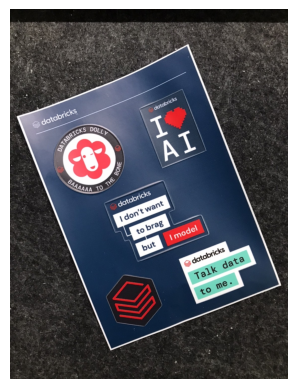

In [5]:
# img1 = cv2.imread("./Homography/ms_lens_1.jpg")
# img2 = cv2.imread("./Homography/ms_lens_2.jpg")
# img3 = cv2.imread("./Homography/ms_lens_3.jpg")
# C:\Users\ASUS\Desktop\cv-lab-2025\Homography\ms_lens_1.jpg
# concat_imgs = hconcat_resize([img1, img2, img3])


# img1 = cv2.imread(r"C:\Users\ASUS\Desktop\cv-lab-2025\Homography\ms_lens_1.jpg")
# img2 = cv2.imread(r"C:\Users\ASUS\Desktop\cv-lab-2025\Homography\ms_lens_2.jpg")
# img3 = cv2.imread(r"C:\Users\ASUS\Desktop\cv-lab-2025\Homography\ms_lens_3.jpg")

# # Resize the concatenated image to a width of 720 pixels while maintaining aspect ratio
 
# apr = 720 / concat_imgs.shape[1]                    # fraction to scale height proportionally
# dim = (720, int(concat_imgs.shape[0] * apr))        # new dimensions
# concat_imgs = cv2.resize(concat_imgs, dim, cv2.INTER_CUBIC)

# # Convert BGR (OpenCV) → RGB (Matplotlib)
# concat_imgs_rgb = cv2.cvtColor(concat_imgs, cv2.COLOR_BGR2RGB)

# plt.figure(figsize=(10, 6))
# plt.imshow(concat_imgs_rgb)
# plt.axis("off")
# plt.show()


image_path = r"C:\Users\ASUS\Desktop\cv-lab-2025\Homography\databricks.jpg"
image = cv2.imread(image_path)
assert image is not None, "Image not found. Check the path."
fig = plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Get 4 corners

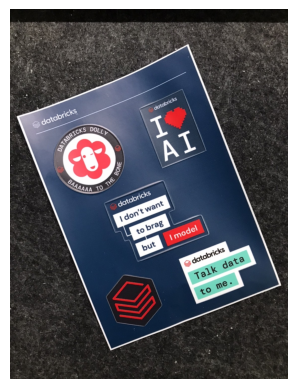

In [6]:
# import matplotlib.pyplot as plt
# image_path = "./Homography/databricks.jpg"
# image = cv2.imread(image_path)
# fig = plt.figure()
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))



image_path = r"C:\Users\ASUS\Desktop\cv-lab-2025\Homography\databricks.jpg"
image = cv2.imread(image_path)
assert image is not None, f"Image not found at {image_path}"
fig = plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [7]:
import matplotlib
matplotlib.use('tkagg')  # ensures a clickable window

In [8]:
# Click event function
def onclick(event):
    ix, iy = event.xdata, event.ydata
    if ix is not None and iy is not None:  # ignore clicks outside the image
        print(f"Clicked at: ({int(ix)}, {int(iy)})")

# Display image
fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Connect the click event
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show(block=True)

Clicked at: (15, 402)
Clicked at: (711, 147)
Clicked at: (1073, 1094)
Clicked at: (399, 1342)


In [9]:
fig.canvas.mpl_disconnect(cid)
print("Click event disconnected.")

Click event disconnected.


In [10]:
src_corners = np.float32([[33, ], [, ], [, ], [, ]])                # corners from the click in the image
dst_corners = np.float32([[0, 0], [480,0], [0, 640], [480, 640]]) # 640 x 480

SyntaxError: invalid syntax (495765178.py, line 1)

In [ ]:
# Back to matplotlib inline

%matplotlib inline

In [ ]:
M = cv2.getPerspectiveTransform(src_corners,dst_corners)
warped_img = cv2.warpPerspective(image, M, (480,640))
warped_img_rgb = cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(warped_img_rgb)
plt.axis("off")
plt.show()


#M if we want to know the matrix

NameError: name 'src_corners' is not defined

# Perspective Transformation Example -2

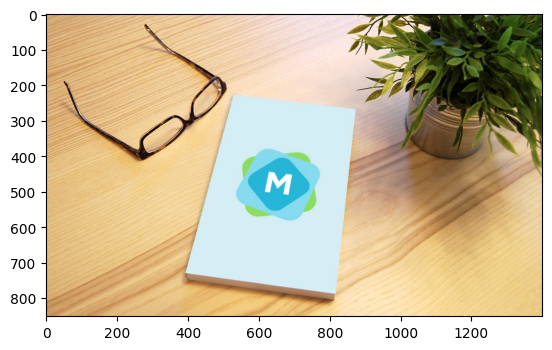

In [ ]:
image_path_perspective = "./Homography/desk-perspective.png"
persp_img = cv2.imread(image_path_perspective)
fig = plt.figure()
plt.imshow(cv2.cvtColor(persp_img, cv2.COLOR_BGR2RGB))

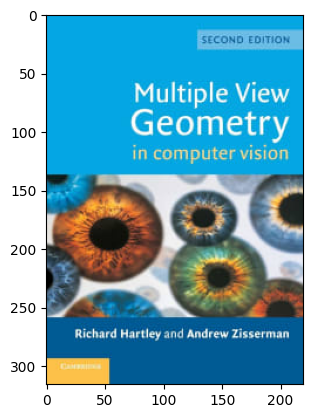

In [ ]:
image_path_normal = "./Homography/desk-normal.png"
norm_img = cv2.imread(image_path_normal)
fig = plt.figure()
plt.imshow(cv2.cvtColor(norm_img, cv2.COLOR_BGR2RGB))

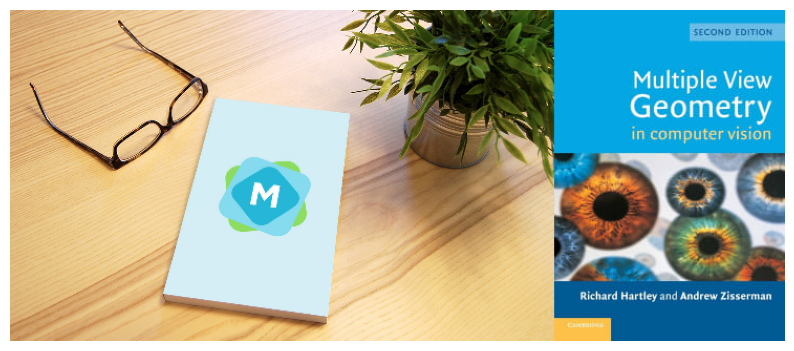

In [ ]:
# Concatenate images for comparison
# two_imgs = hconcat_resize()
# two_imgs_rgb = cv2.cvtColor(two_imgs, cv2.COLOR_BGR2RGB)
# plt.figure(figsize=(10, 6))
# plt.imshow(two_imgs_rgb)
# plt.axis("off")
# plt.show()


# Concatenate images for comparison
two_imgs = hconcat_resize([persp_img, norm_img])
two_imgs_rgb = cv2.cvtColor(two_imgs, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(two_imgs_rgb)
plt.axis("off")
plt.show()

In [ ]:
matplotlib.use('tkagg')  # ensures a clickable window

# Click event function
def onclick(event):
    ix, iy = event.xdata, event.ydata
    if ix is not None and iy is not None:  # ignore clicks outside the image
        print(f"Clicked at: ({int(ix)}, {int(iy)})")
        
# Display image
fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(persp_img, cv2.COLOR_BGR2RGB))

# Connect the click event
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show(block=True)

Clicked at: (527, 225)
Clicked at: (874, 270)
Clicked at: (808, 799)
Clicked at: (396, 736)


In [ ]:
fig.canvas.mpl_disconnect(cid)
print("Click event disconnected.")

Click event disconnected.


In [ ]:
%matplotlib inline

In [ ]:
# Define the corners of the perspective image where the normal image will be overlayed
# You need to define these corners manually or using some annotation tool
corners_perspective = np.array([
    [527, 225],   # top-left
    [874, 270],   # top-right
    [808, 799],   # bottom-right
    [396, 736]    # bottom-left
], dtype=np.float32) # top-left, top-right, bottom-right, bottom-left

# Define the corners of the normal image
h, w = norm_img.shape[:2]
corners_normal = np.array([[0, 0], [w, 0], [w, h], [0, h]], dtype=np.float32)  # top-left, top-right, bottom-right, bottom-left

# Compute the homography matrix
homography_matrix, _ = cv2.findHomography(corners_normal, corners_perspective)

# Warp the normal image to the perspective image using the homography
warped_normal_image = cv2.warpPerspective(norm_img, homography_matrix, (persp_img.shape[1], persp_img.shape[0]))

In [ ]:
fig = plt.figure()
plt.imshow(cv2.cvtColor(warped_normal_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

(np.float64(-0.5), np.float64(1399.5), np.float64(851.5), np.float64(-0.5))

: 

## If we want to combine the wrapped image with the original perspective image

In [ ]:
# Create a mask for the overlay
overlay_mask = np.ones_like(persp_img, dtype=np.uint8) * 255

(np.float64(-0.5), np.float64(1399.5), np.float64(851.5), np.float64(-0.5))

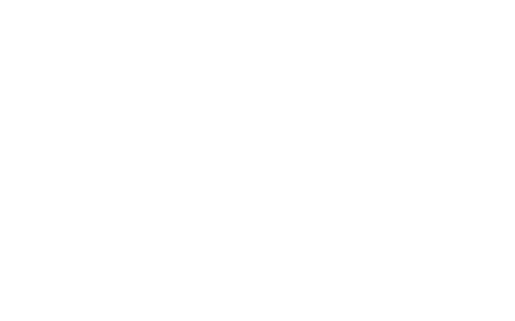

In [ ]:
fig = plt.figure()
plt.imshow(cv2.cvtColor(overlay_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [11]:
cv2.fillConvexPoly(overlay_mask, corners_perspective.astype(np.int32), (0, 0, 0))

# cv2.fillConvexPoly(img, points, color) --> 0 in color value ensures overlay will not appear (black = blocked)

NameError: name 'overlay_mask' is not defined

(np.float64(-0.5), np.float64(1399.5), np.float64(851.5), np.float64(-0.5))

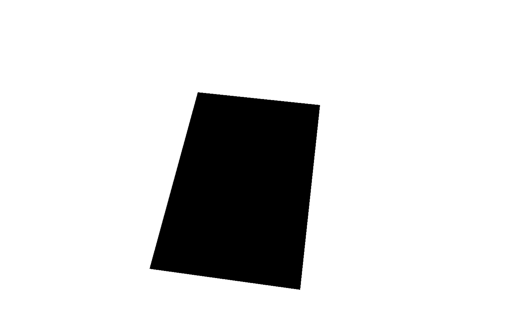

In [ ]:
fig = plt.figure()
plt.imshow(cv2.cvtColor(overlay_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [ ]:
# Overlay the warped normal image onto the perspective image
overlaid_image = persp_img.copy()
overlaid_image[overlay_mask == 0] = warped_normal_image[overlay_mask == 0]

## overlaid_image[overlay_mask == 0] → this creates a boolean array where the mask is black (0). 
## warped_normal_image[overlay_mask == 0] → selects the corresponding pixels from the warped normal image.

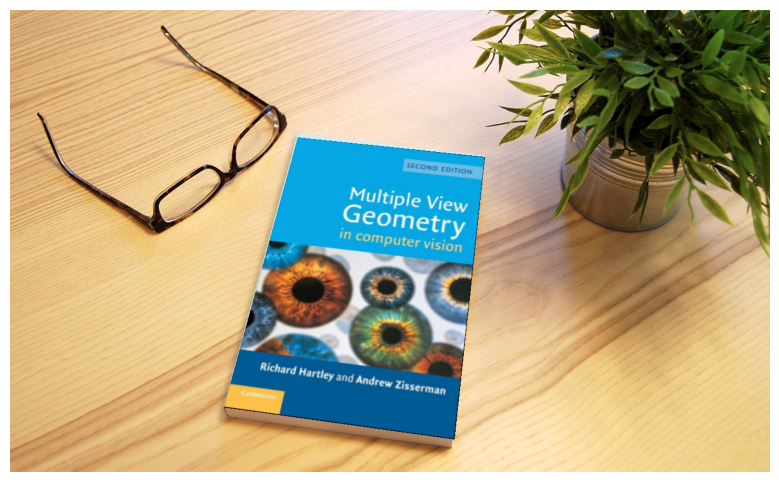

In [ ]:
overlaid_image_rgb = cv2.cvtColor(overlaid_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(overlaid_image_rgb)
plt.axis("off")
plt.show()